# NLP using tensorflow


## Importing Dependencies

In [1]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf

In [2]:
#example with a 'dummy dataset' consisted of 3 sentence: 
sentences = [
             "I like eggs and ham.",   
             "I love chocolate and bunnies.",  
             "I hate onions."]

In [3]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)
print(sequences)

[[1, 3, 4, 2, 5], [1, 6, 7, 2, 8], [1, 9, 10]]


In [4]:
#How to get the word to index mapping:
tokenizer.word_index

{'and': 2,
 'bunnies': 8,
 'chocolate': 7,
 'eggs': 4,
 'ham': 5,
 'hate': 9,
 'i': 1,
 'like': 3,
 'love': 6,
 'onions': 10}

In [5]:
data = pad_sequences(sequences)
print(data)

[[ 1  3  4  2  5]
 [ 1  6  7  2  8]
 [ 0  0  1  9 10]]


In [6]:
#SPAM DETECTION
##modelLSTM: 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

!wget https://lazyprogrammer.me/course_files/spam.csv

--2020-07-07 03:07:41--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.31.81.48, 104.31.80.48, 172.67.213.166, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.31.81.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.05s   

2020-07-07 03:07:41 (9.89 MB/s) - ‘spam.csv’ saved [503663/503663]



In [9]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [10]:
df = df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis = 1)

In [11]:
from sklearn.model_selection import train_test_split
df['b_labels'] = df['v1'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values
df_train, df_test, Y_train, Y_test = train_test_split(df['v2'], Y, test_size = 0.3)

In [12]:
tokenizer_spam = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer_spam.fit_on_texts(df_train)
sequences_train = tokenizer_spam.texts_to_sequences(df_train)
sequences_test = tokenizer_spam.texts_to_sequences(df_test)
sequences_train_pad = pad_sequences(sequences_train)
sequences_test_pad = pad_sequences(sequences_test)

In [14]:
word2indx = tokenizer_spam.word_index
V = len(word2indx)
T = sequences_train_pad.shape[1]

In [15]:
#model:
D = 20
M = 15

i = Input(shape=(T,))
x = Embedding(V+1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)
model = Model(i, x)

In [18]:
model.compile(
    loss ='binary_crossentropy',
    optimizer ='adam',
    metrics = ['accuracy']
)
r = model.fit(
    sequences_train_pad,
    Y_train, 
    epochs = 10, 
    validation_data=(sequences_test_pad, Y_test)
)

Epoch 1/10
122/122 [==============================] - 4s 36ms/step - loss: 0.4610 - accuracy: 0.8659 - val_loss: 0.3714 - val_accuracy: 0.8648
Epoch 2/10
122/122 [==============================] - 4s 31ms/step - loss: 0.3109 - accuracy: 0.8664 - val_loss: 0.2426 - val_accuracy: 0.8648
Epoch 3/10
122/122 [==============================] - 4s 31ms/step - loss: 0.1920 - accuracy: 0.8949 - val_loss: 0.1619 - val_accuracy: 0.9791
Epoch 4/10
122/122 [==============================] - 4s 31ms/step - loss: 0.1168 - accuracy: 0.9915 - val_loss: 0.1009 - val_accuracy: 0.9898
Epoch 5/10
122/122 [==============================] - 4s 31ms/step - loss: 0.0720 - accuracy: 0.9959 - val_loss: 0.0797 - val_accuracy: 0.9886
Epoch 6/10
122/122 [==============================] - 4s 31ms/step - loss: 0.0473 - accuracy: 0.9979 - val_loss: 0.0695 - val_accuracy: 0.9880
Epoch 7/10
122/122 [==============================] - 4s 31ms/step - loss: 0.0340 - accuracy: 0.9990 - val_loss: 0.0549 - val_accuracy: 0.9910

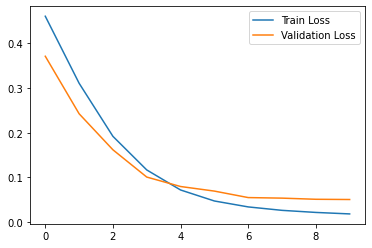

In [20]:
plt.plot(r.history['loss'], label = 'Train Loss')
plt.plot(r.history['val_loss'], label = 'Validation Loss')
plt.legend()

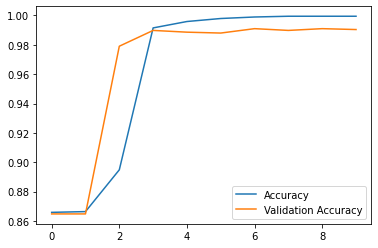

In [21]:
plt.plot(r.history['accuracy'], label = 'Accuracy')
plt.plot(r.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()

## NLP CNN

In [22]:
from tensorflow.keras.layers import Conv1D, MaxPooling1D

i = Input(shape=(T,))
x = Embedding(V+1, D)(i)
x = Conv1D(32,3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(64,3, activation='relu')(x)
x = MaxPooling1D(3)(x)
x = Conv1D(128,3, activation='relu')(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)
model_cnn = Model(i, x)

In [23]:
model_cnn.compile(
    loss ='binary_crossentropy',
    optimizer ='adam',
    metrics = ['accuracy']
)
r_cnn = model_cnn.fit(
    sequences_train_pad,
    Y_train, 
    epochs = 10, 
    validation_data=(sequences_test_pad, Y_test)
)

Epoch 1/10
122/122 [==============================] - 2s 13ms/step - loss: 0.3837 - accuracy: 0.8664 - val_loss: 0.2857 - val_accuracy: 0.8648
Epoch 2/10
122/122 [==============================] - 1s 10ms/step - loss: 0.1311 - accuracy: 0.9495 - val_loss: 0.0745 - val_accuracy: 0.9839
Epoch 3/10
122/122 [==============================] - 1s 10ms/step - loss: 0.0200 - accuracy: 0.9946 - val_loss: 0.0512 - val_accuracy: 0.9856
Epoch 4/10
122/122 [==============================] - 1s 10ms/step - loss: 0.0055 - accuracy: 0.9990 - val_loss: 0.0661 - val_accuracy: 0.9880
Epoch 5/10
122/122 [==============================] - 1s 10ms/step - loss: 0.0028 - accuracy: 0.9997 - val_loss: 0.0562 - val_accuracy: 0.9892
Epoch 6/10
122/122 [==============================] - 1s 10ms/step - loss: 0.0017 - accuracy: 0.9997 - val_loss: 0.0721 - val_accuracy: 0.9892
Epoch 7/10
122/122 [==============================] - 1s 10ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 0.0629 - val_accuracy: 0.9892

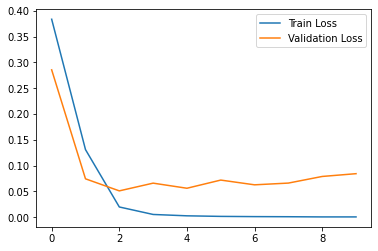

In [24]:
plt.plot(r_cnn.history['loss'], label = 'Train Loss')
plt.plot(r_cnn.history['val_loss'], label = 'Validation Loss')
plt.legend()

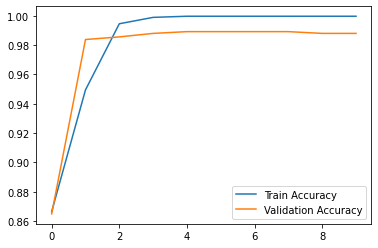

In [26]:
plt.plot(r_cnn.history['accuracy'], label = 'Train Accuracy')
plt.plot(r_cnn.history['val_accuracy'], label = 'Validation Accuracy')
plt.legend()